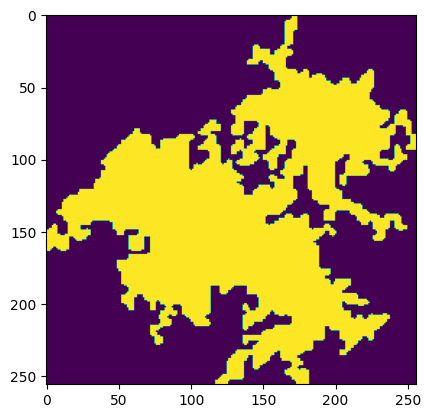

In [2]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from augment_train import augment_train
import time
import matplotlib.pyplot as plt

urothelial_cells=pd.read_pickle("urothelial_cell_toy_data.pkl")
X = urothelial_cells["X"].numpy()  # (200, 3, 256, 256)
Y = urothelial_cells["y"]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = torch.FloatTensor(X_train)  # (N, C, H, W)
X_val = torch.FloatTensor(X_val)
Y_train = torch.LongTensor(Y_train)  # (N, 1, H, W)
Y_val = torch.LongTensor(Y_val)

#get fake images and append to orignal X_train and Y_train
my_X_train, my_X_test, my_Y_train, my_Y_test = train_test_split(X_train, Y_train, test_size=0.5, random_state=42)
#my_Y_test is the respective labels for the fake cells.
plt.imshow(my_Y_test[0])

In [4]:
import glob
from torchvision import transforms
from PIL import Image

image_paths = sorted(glob.glob("fake_cells_train/*_fake_B.png"))

image_tf = transforms.Compose([transforms.ToTensor(),])

fake_images = [image_tf(Image.open(p)) for p in image_paths]

X_fake = torch.stack(fake_images)
Y_fake = my_Y_test



print("X_fake shape:", X_fake.shape) #should be (N, 3, 256, 256)

#combine
X_train_with_fake = torch.cat([X_train, X_fake], dim=0)
Y_train_with_fake = torch.cat([Y_train, Y_fake], dim=0)

print("X_train_with_fake shape:", X_train_with_fake.shape) #should be (160+80, 3, 256, 256), 

X_fake shape: torch.Size([80, 3, 256, 256])
X_train_with_fake shape: torch.Size([240, 3, 256, 256])


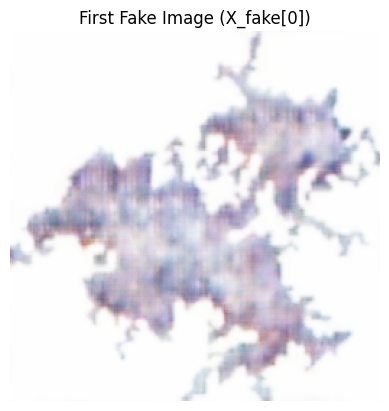

In [5]:
first_img_tensor = X_fake[0]
img_np = first_img_tensor.permute(1, 2, 0).numpy()  # Convert to HWC format
plt.imshow(img_np)
plt.title("First Fake Image (X_fake[0])")
plt.axis('off')
plt.show()